### CS 678 Machine Learning
#### Programming Assignment 1
#### Data Analysis Preliminaries
#### Ron Rounsifer
<hr>

### Overview
1) Pre-processing - clean the data<br>
2) Visualization - display the data with a scatter plot.<br>
3) Analysis - perform simple linear regression on the data<br>

### Abstract
Since this assignment is straight forward and is more used as a warm-up exercise to refamiliarize ourselves with the techniques necassary to clean, visualize, and analyze data I went about impelementing the simple linear regression in two different ways. The first instance is a simple script that will run through the commands line by line, all while executing them in this linear fashion. The second is a class that can be used as a "toolkit" of sorts that allows others to import and use this class in their own programs. The following report regarding the code design will be broken down into the sections provided by the overview found above.

### 1) Pre-processing

In [2]:
def load(self, filename, **kwargs):
    """Load data
    
    Loads the file specified by the users and applies filters if passed.
    """
    # Load data
    self.data = np.loadtxt(open(filename, 'rb'), delimiter=',')
    
    # check for keywords
    if len(kwargs) > 0:  
        # filter the data
        if 'filters' in kwargs.keys():
            # create and apply filters to data
            if 'delete' == kwargs['filters']:
                data_filter = ~np.any(np.isnan(self.data), axis=1)
                self.data = self.data[data_filter]
            else:
                print("The filter you entered is not valid. No filter applied.\n Check load() method.")

Like most data sets found in the real world, there was the instance of missing data (represented by nan) in the data we were given. There are many different ways of handling these types of problems, such as replacing them with the mean number of book sales per month or by simply deleting them. For this case, I chose to delete all of the nan values seeing as there were not many in the data so the deletion should not have a drastic effect on the regression model. Not only this, but if I were to replace missing instances with the mean then this would cause the variance of the model to decrease. In order to maintain as truthful a variance as possible it would is imperative to simply leave the data as it is.

Since the cleaning of the data has been defined in the method above that can handle keyword arguments, it grants the user the ability to expand on the types of filters they wish to apply to the data. In the example above only the 'delete' filter is hardcoded, but if one may generate the code for a 'mean', 'median', 'mode', or any other type of filter that you wish to apply to nan data.

### 2) Visualization

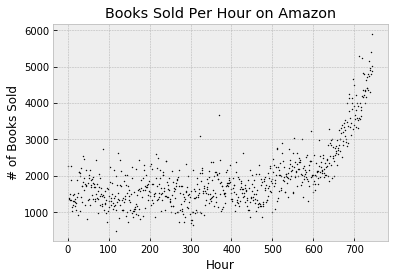

In [8]:
def plotData(self):
    # matplotlib customizations
    plt.style.use('bmh')
    plt.title('Books Sold Per Hour on Amazon')
    plt.xlabel('Hour')
    plt.ylabel('# of Books Sold')   
    
    x = [time[0] for time in self.data]
    y = [sales[1] for sales in self.data]
    plt.scatter(x,y,s=0.85, marker='o', color='black')
    plt.show()
    
data = DataAnalysis()
data.load('./data.txt', filters='delete')
data.plotData()
    

Before attempting to extract any information from our data sets using machine learning techniques, the first step typically requires that we visualize the data. This can be done in the form a histogram, scatterplot, boxplots, or any other form of visual aid. The code above allows us to see how the data appears when plotted with a scatter plot. As you can see from the outputted graph, the book sales had stayed around a consistent average 1500 books sold during the hour, but they began to increase near the end of the month, which is most likely attributed to the mention that the well-read blogger made regarding the book.

### 3) Analysis

In [ ]:
def SLR(self):
    """Simple Linear Regression
    
    Computes the best fit line to the data using the simple
    linear regression technique.
    """
    # Assign axis variables and add to plot
    x = [time[0] for time in self.data]
    y = [sales[1] for sales in self.data]
    plt.scatter(x, y, s=0.85, marker='o', color='black')

    # Calculating LOBF formula
    num_obs = len(self.data) 
    x_sum = sum(x)
    y_sum = sum(y)
    xy_sum = sum([a*b for a,b in zip(x,y)])
    x_squared_sum = sum([i**2 for i in x])

    numerator = (num_obs * xy_sum) - (x_sum * y_sum)
    denominator = (num_obs * x_squared_sum) - (x_sum**2)
    slope = numerator / denominator
    intercept = (y_sum - (slope * x_sum)) / num_obs
    
    # String version for the legend
    LOBF = 'y=' + str(round(intercept,2)) + '+' + str(round(slope,2)) + 'x'  
    return num_obs, intercept, slope, LOBF

In [ ]:
def QR(self):
    """Quadratic Regression
        
    Creates a line of best fit using quadratic regression.
    """
    # Assign axis variables and add to plot
    x = [time[0] for time in self.data]
    x_squared = [x**2 for x in x]
    y = [sales[1] for sales in self.data]
    plt.scatter(x, y, s=0.85, marker='o', color='black')

    # calculate line of best fit
    num_obs = len(self.data)
    x_sum = sum(x)
    x_squared_sum = sum(x_squared)
    y_sum = sum(y)
    mean_y = sum(y)/num_obs
    mean_x = sum(x)/num_obs
    mean_x_squared = sum(x_squared)/num_obs

    y_x_sum = sum([y*x for y,x in zip(y,x)])
    mean_y_x = (y_sum*x_sum)/num_obs
    s_y1 = y_x_sum - mean_y_x 

    s_22 = sum([x**2 for x in x_squared]) - ((x_squared_sum**2)/num_obs)

    y_x_squared_sum = sum([y*x for y,x in zip(y,x_squared)])
    s_y2 =  y_x_squared_sum - ((y_sum * x_squared_sum)/num_obs)  

    s_12 = sum([x*x_squared for x,x_squared in zip(x, x_squared)]) - ((x_sum*x_squared_sum)/num_obs)
    s_11 = sum([x**2 for x in x]) - (x_sum**2/num_obs)

    beta_two = ((s_y1*s_22)-(s_y2*s_12)) / ((s_22*s_11)-(s_12**2))
    beta_three = ((s_y2*s_11)-(s_y1*s_12)) / ((s_22*s_11)-(s_12**2))  
    beta_one  = mean_y - (beta_two*mean_x) - (beta_three*mean_x_squared)
    
    # y = b1 + b2x1 + b3x^2
    # Str version of formula for legend
    LOBF = 'y=' + str(round(beta_one,2)) + '+' + str(round(beta_two,2)) + 'x+' + str(round(beta_three,2)) + 'x^2'   

    return num_obs, beta_one, beta_two, beta_three, LOBF
        

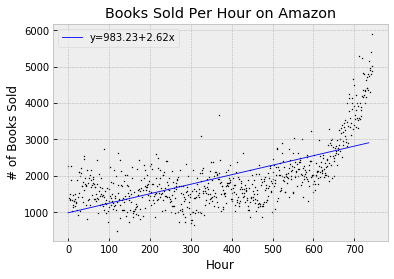

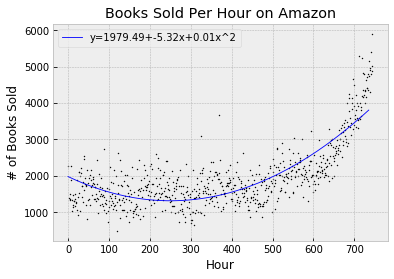

In [9]:
# SLR example
num_obs, intercept, slope, LOBF_slr = data.SLR()
data.graph(lambda x : intercept + (slope*x), range(0, num_obs), LOBF_slr)

# QR example
num_obs, b1, b2, b3, LOBF_qr = data.QR()
data.graph(lambda x : b1 + (b2*x) + (b3*(x**2)), range(0,num_obs), LOBF_qr)

Due to this increase in sales near the end, the simple linear regression analysis is not able to accurately capture the expected popularity of the book in the future since the book sales began to increase significantly. Of course, simple linear regression is not the only model that we could use to model the data. As in this case, we can go about and create a line of best fit that makes use of quadratic regression. This model will definitely fit the data better, but that does not mean that this model will be useful in predicting the future sales. I say this because up until the point that the blogger made a positive mention of the book, the sales were somewhat stagnant, so we can not expect the sales to continue to increase at this rate as modeled by the quadratic regression model.
<hr>

### Class Source Code

In [5]:
"""Data Analysis Preliminaries

A simple data visualization exercise.
Given a dataset of book sales per hour on Amazon perform the following:
  1 - Clean the data
  2 - Create a scatter plot of the data
  3 - Generate line of best fit
  4 - Plot line of best fit on data

Todo:
  1 - Generate a line of best fit using the formula given.
  2 - Plot line of best fit on graph along with data points.

@author Ron Rounsifer
@version 01.09.2019 (01.09.2019)
"""
import numpy as np
import matplotlib.pyplot as plt

class DataAnalysis(object):
    def init(self):
        """ Constructor
        Create an empty data set.
        """
        self.data = None
    
    def load(self, filename, **kwargs):
        """Load data
        
        Loads the file specified by the users and applies filters if passed.
        """
        # Load data
        self.data = np.loadtxt(open(filename, 'rb'), delimiter=',')
        
        # check for keywords
        if len(kwargs) > 0:
            # filter the data
            if 'filters' in kwargs.keys():
                if 'delete' == kwargs['filters']:
                    data_filter = ~np.any(np.isnan(self.data), axis=1)
                    self.data = self.data[data_filter]
                else:
                    print("The filter you entered is not valid. No filter applied.\n Check load() method.")
    def plotData(self):
        """Visualize Data
        
        Plots the data in a scatter plot. (x = time past, y = sales)
        """
        # matplotlib customizations
        plt.style.use('bmh')
        plt.title('Books Sold Per Hour on Amazon')
        plt.xlabel('Hour')
        plt.ylabel('# of Books Sold')

        x = [time[0] for time in self.data]
        y = [sales[1] for sales in self.data]
        plt.scatter(x,y,s=0.85, marker='o', color='black')
        plt.show()

    def SLR(self):
        """Simple Linear Regression
    
        Creates a line of best fit using simple linear regression.
        """
        # Assign axis variables and add to plot
        x = [time[0] for time in self.data]
        y = [sales[1] for sales in self.data]
        plt.scatter(x, y, s=0.85, marker='o', color='black')

        # Calculating LOBF formula
        num_obs = len(self.data) 
        x_sum = sum(x)
        y_sum = sum(y)
        xy_sum = sum([a*b for a,b in zip(x,y)])
        x_squared_sum = sum([i**2 for i in x])

        numerator = (num_obs * xy_sum) - (x_sum * y_sum)
        denominator = (num_obs * x_squared_sum) - (x_sum**2)
        slope = numerator / denominator
        intercept = (y_sum - (slope * x_sum)) / num_obs

        # String version for the legend
        LOBF = 'y=' + str(round(intercept,2)) + '+' + str(round(slope,2)) + 'x'  
        return num_obs, intercept, slope, LOBF

    def QR(self):
        """Quadratic Regression
        
        Creates a line of best fit using quadratic regression.
        """
        # Assign axis variables and add to plot
        x = [time[0] for time in self.data]
        x_squared = [x**2 for x in x]
        y = [sales[1] for sales in self.data]
        plt.scatter(x, y, s=0.85, marker='o', color='black')

        # calculate line of best fit
        num_obs = len(self.data)
        x_sum = sum(x)
        x_squared_sum = sum(x_squared)
        y_sum = sum(y)
        mean_y = sum(y)/num_obs
        mean_x = sum(x)/num_obs
        mean_x_squared = sum(x_squared)/num_obs

        y_x_sum = sum([y*x for y,x in zip(y,x)])
        mean_y_x = (y_sum*x_sum)/num_obs
        s_y1 = y_x_sum - mean_y_x 

        s_22 = sum([x**2 for x in x_squared]) - ((x_squared_sum**2)/num_obs)

        y_x_squared_sum = sum([y*x for y,x in zip(y,x_squared)])
        s_y2 =  y_x_squared_sum - ((y_sum * x_squared_sum)/num_obs)  

        s_12 = sum([x*x_squared for x,x_squared in zip(x, x_squared)]) - ((x_sum*x_squared_sum)/num_obs)
        s_11 = sum([x**2 for x in x]) - (x_sum**2/num_obs)

        beta_two = ((s_y1*s_22)-(s_y2*s_12)) / ((s_22*s_11)-(s_12**2))
        beta_three = ((s_y2*s_11)-(s_y1*s_12)) / ((s_22*s_11)-(s_12**2))  
        beta_one  = mean_y - (beta_two*mean_x) - (beta_three*mean_x_squared)

        LOBF = 'y=' + str(round(beta_one,2)) + '+' + str(round(beta_two,2)) + 'x+' + str(round(beta_three,2)) + 'x^2'   

        return num_obs, beta_one, beta_two, beta_three, LOBF
        # y = b1 + b2x1 + b3x2

    def graph(self, f, steps, LOBF_str):
        """Graph line of best fit
        
        Passed a lambda function of the line of best fit (LOBF) and the numbers
        of instances to plot for the LOBF, each number is ran through the lambda
        function, where the output is finally plotted.

        args:
          f - lamba function that is the equation to be plotted
          steps - the values of x used
        """

        # matplotlib customizations
        plt.style.use('bmh')
        plt.title('Books Sold Per Hour on Amazon')
        plt.xlabel('Hour')
        plt.ylabel('# of Books Sold')

        x = np.array(steps)
        y = f(x)
        plt.plot(x,y,linewidth=0.85, color='blue', label=LOBF_str)
        plt.legend(loc='upper left',  fontsize='medium')
        plt.show()

### Script Source Code

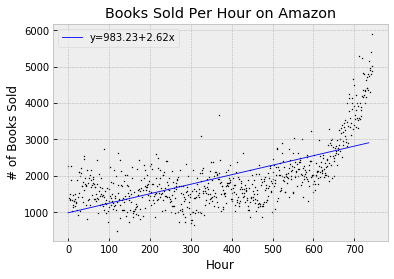

In [10]:
"""Data Analysis Preliminaries

A simple data visualization exercise.
Given a dataset of book sales per hour on Amazon perform the following:
  1 - Clean the data
  2 - Create a scatter plot of the data
  3 - Generate line of best fit
  4 - Plot line of best fit on data

Todo:
  1 - Generate a line of best fit using the formula given.
  2 - Plot line of best fit on graph along with data points.

@author Ron Rounsifer
@version 01.09.2019 (01.09.2019)
"""
import numpy as np
import matplotlib.pyplot as plt

# matplotlib customizations
plt.style.use('bmh')
plt.title('Books Sold Per Hour on Amazon')
plt.xlabel('Hour')
plt.ylabel('# of Books Sold')

def graph(f, steps, LOBF_str):
  """Graph line of best fit

  Passed a lambda function of the line of best fit (LOBF) and the numbers
  of instances to plot for the LOBF, each number is ran through the lambda
  function, where the output is finally plotted.

  args:
    f - lamba function that is the equation to be plotted
    steps - the values of x used
  """
  x = np.array(steps)
  y = f(x)
  plt.plot(x,y,linewidth=0.85, color='blue', label=LOBF_str)
  plt.legend(loc='upper left',  fontsize='medium')
  plt.show()

# Load data and remove nan data
data = np.loadtxt(open("data.txt", "rb"), delimiter=",")
rows_mask = ~np.any(np.isnan(data), axis=1)
data = data[rows_mask]

# Assign axis variables and add to plot
x = [time[0] for time in data]
y = [sales[1] for sales in data]
plt.scatter(x, y, s=0.85, marker='o', color='black')

# Calculating LOBF formula
n = len(data) # no. of obs
x_sum = sum(x)
y_sum = sum(y)
xy_sum = sum([a*b for a,b in zip(x,y)])
x_squared_sum = sum([i**2 for i in x])

numerator = (n * xy_sum) - (x_sum * y_sum)
denominator = (n * x_squared_sum) - (x_sum**2)
slope = numerator / denominator
intercept = (y_sum - (slope * x_sum)) / n

LOBF = 'y=' + str(round(intercept,2)) + '+' + str(round(slope,2)) + 'x'  

graph(lambda x : intercept + (slope * x), range(0,n), LOBF)

<hr>

## Extra Work
### Class vs. Script Implementation
As stated in abstract, I wrote this code in two different formats: the first is a script that runs through, plots the data points, generates the simple linear regression line of best fit, and plots that on top of the data, and the second is a class that can be instantiated, loaded data, visual the data, and generate lines of best fit for both linear and quadratic regression.
<br>
<br>
The main reason behind rewriting the script into the class form was to make the code become more generalized. This gives the user the ability to use different datasets, instead of being limited to the one hard-coded dataset, add new types of analysis, and even allow for different filters to be added in when cleaning the data. In other words, the class version is completely customizable and reusable, whereas the script really only has one use unless you were to go in and modify the script. During the development of the more general form I became curious as to how the execution times of the two types programs execute. After running a few tests, the results were fairly inconclusive, but 